# Get polygons and images from GBDX

Some of the functions used in this notebook can be found in the nice_functions.py file in the Functions folder

In [1]:
!pip freeze > stable-req.txt

In [2]:
# add path to function path to sys path

import os
import sys
module_path = os.path.abspath(r'C:\Users\charl\Documents\GitHub\GGCW_GBDX_tools\Functions')  # add funciotns directory to system path
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
### home made functions
import nice_functions as nf
reload(nf)

import get_OSM_polygons as getOSM
reload(getOSM)

### other libraries

import pandas as pd
import numpy as np
from shapely.ops import transform
from shapely.geometry import mapping, Polygon, box, shape
import matplotlib.pyplot as plt
import random
import geopandas as gpd
import fiona
import pickle

from gbdxtools import Interface
from gbdxtools.task import env
from gbdxtools import CatalogImage

gbdx = Interface()

In [4]:
### set some parameters

min_size = .1

In [5]:
dict_type = {'Forest': 1,'Wood': 1,'Nature Reserve': 1,
             'Grass': 2, 'Farmland': 2, 'Meadow' : 2, 'Fell' : 2, 'Heath' : 2, 'Grassland' : 2, 
             'Water': 3, 'Wetland': 3, 
             'Building': 4, 
             'Theatre': 0, 'Pitch':0}

buffer_size =  -10

In [6]:
## Get city bounding box

workspace = r'C:\Users\charl\Documents\GOST\Georgia'
city = 'Tbilisi'
shapefile = os.path.join(workspace, 'Admin_Boundary',r'Tbilisi_sazrvari.shp')
park_size = 1
parkmax = 500

adminboundary = gpd.read_file(shapefile)
if adminboundary.crs != {'init' :'epsg:4326'}:
    adminboundary = adminboundary.to_crs({'init' :'epsg:4326'})
    
## Select the right bounding city polygon and load it
boundpoly = adminboundary.geometry.loc[0]
boundpoly_wkt = str(boundpoly)

# convert to a bounding box
bbox_large_area_float = list(boundpoly.bounds)

# UTM zone and EPSG code calculator
zone_cal = round((183+bbox_large_area_float[0])/6,0)
EPSG = 32700-round((45+bbox_large_area_float[1])/90,0)*100+round((183+bbox_large_area_float[0])/6,0)

UTM_EPSG_code ='EPSG:%i'  % (EPSG)

print UTM_EPSG_code

city

EPSG:32638


'Tbilisi'

In [8]:
################ this takes some time

sample_size = 25
sample_size_b = 50

labels = ['forest', 'grass', 'water' , 'building']

dict_size = {'forest': 1 , 'grass': .6, 'water': 1, 'building': .8}

geom_list_selection_all = []

selection_all = pd.DataFrame()

for label in labels: 
    
    selection, geojson_select, geom_list_selection,UTM_EPSG_code,project_utm,project_wgs = getOSM.get_OSM_polygons(city = city, type_query = label,min_size = dict_size[label], bbox_city = bbox_large_area_float)
    
    if label != 'building':
        geom_list_selection_all.extend(geom_list_selection[:sample_size])
        selection_all = selection_all.append(selection[:sample_size])
        print('added %s examples for %s' % (len(selection[:sample_size]), label))
    
    elif label == 'building':
        geom_list_selection_all.extend(geom_list_selection[:sample_size_b])
        selection_all = selection_all.append(selection[:sample_size_b])
        print('added %s examples for %s' % (len(selection[:sample_size_b]), label))
    
################ this takes some time    

selection_all = selection_all.reset_index().drop('index',axis = 1)
selection_all.item_type.value_counts()

added 25 examples for forest
added 17 examples for grass
added 25 examples for water
added 25 examples for building


Building     25
Water        25
Forest       21
Grass        15
Wood          4
Grassland     2
Name: item_type, dtype: int64

-----------------------------------------

image for OSM-way-62380275 is good object: 0
2017-09-14T07:59:55.356Z
1030010070409100
Forest


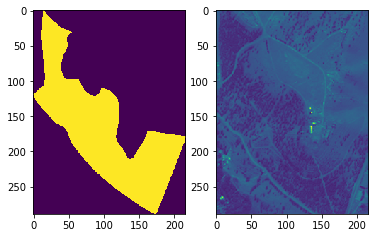

(0L,)
(0L,)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-61976350 is good object: 1
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


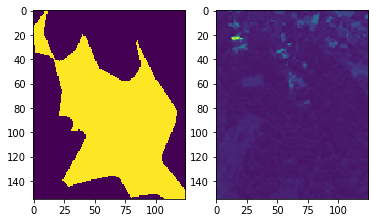

(0L,)
(0L,)
Good Training Data? (y/n) y
-----------------------------------------

Multipolygon - skipping object: 2

-----------------------------------------

image for OSM-way-224459609 is good object: 3
2016-11-09T08:01:26.047Z
1030010061CF0900
Wood


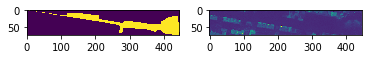

(19375L,)
(8L, 19375L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-75659971 is good object: 4
2017-11-13T08:15:21.999Z
1040010035BF7700
Forest


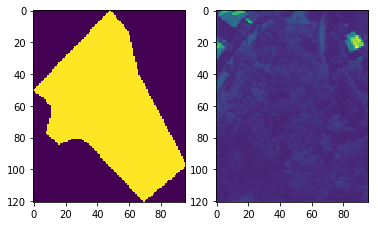

(51415L,)
(8L, 51415L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-75237277 is good object: 5
2017-09-14T07:59:55.356Z
1030010070409100
Forest


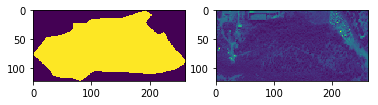

(63031L,)
(8L, 63031L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-95490138 is good object: 6
2017-11-13T08:15:21.999Z
1040010035BF7700
Forest


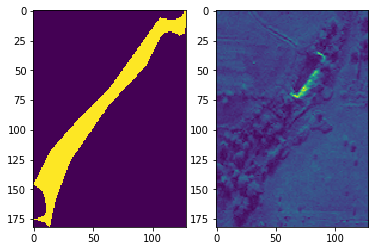

(94995L,)
(8L, 94995L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-62944139 is good object: 7
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


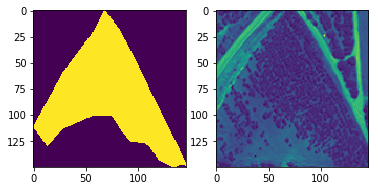

(94995L,)
(8L, 94995L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-75589821 is good object: 8
2017-09-14T07:59:55.356Z
1030010070409100
Forest


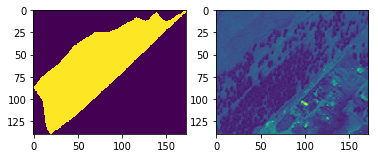

(116895L,)
(8L, 116895L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

Multipolygon - skipping object: 9

-----------------------------------------

image for OSM-way-282632289 is good object: 10
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


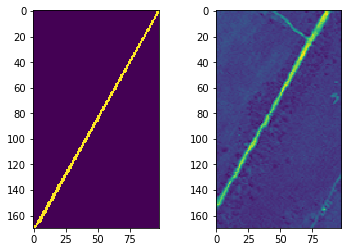

(116895L,)
(8L, 116895L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-75610624 is good object: 11
2017-09-14T07:59:55.356Z
1030010070409100
Forest


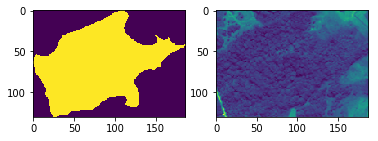

(116895L,)
(8L, 116895L)
Good Training Data? (y/n) y
-----------------------------------------

Multipolygon - skipping object: 12

-----------------------------------------

Multipolygon - skipping object: 13

-----------------------------------------

image for OSM-way-61060039 is good object: 14
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


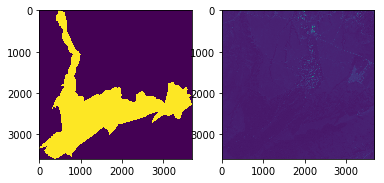

(141392L,)
(8L, 141392L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-363443293 is good object: 15
2017-09-14T07:59:55.356Z
1030010070409100
Forest


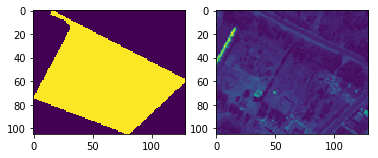

(13367045L,)
(8L, 13367045L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

Multipolygon - skipping object: 16

-----------------------------------------

image for OSM-way-74042486 is good object: 17
2017-09-14T07:59:55.356Z
1030010070409100
Forest


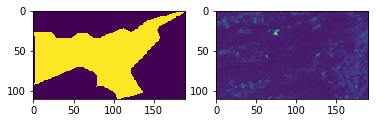

(13367045L,)
(8L, 13367045L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-62690946 is good object: 18
2017-09-14T07:59:55.356Z
1030010070409100
Forest


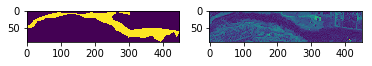

(13367045L,)
(8L, 13367045L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-95488638 is good object: 19
2016-05-17T07:55:44.718Z
10300100543AA700
Forest


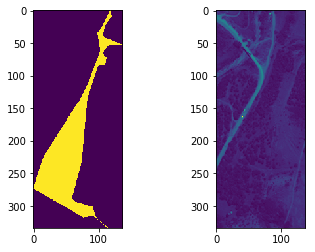

(13367045L,)
(8L, 13367045L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-421642633 is good object: 20
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


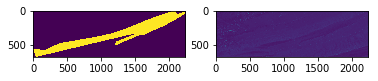

(13367045L,)
(8L, 13367045L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-56396416 is good object: 21
2017-09-14T07:59:55.356Z
1030010070409100
Forest


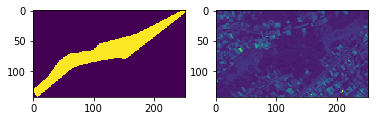

(13367045L,)
(8L, 13367045L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

Multipolygon - skipping object: 22

-----------------------------------------

image for OSM-way-78521400 is good object: 23
2016-05-25T08:00:30.479Z
10300100570CBD00
Wood


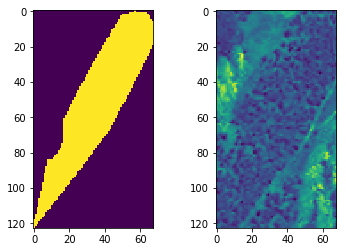

(13367045L,)
(8L, 13367045L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-146184411 is good object: 24
2016-11-09T08:01:26.047Z
1030010061CF0900
Forest


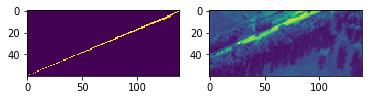

(13375409L,)
(8L, 13375409L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

Multipolygon - skipping object: 25

-----------------------------------------

image for OSM-way-65082801 is good object: 26
2016-11-09T08:01:26.047Z
1030010061CF0900
Grass


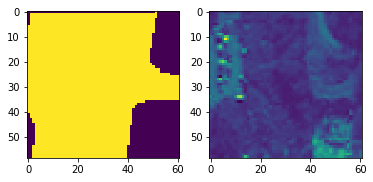

(13375409L,)
(8L, 13375409L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

no image
-----------------------------------------

Multipolygon - skipping object: 28

-----------------------------------------

image for OSM-way-75659011 is good object: 29
2016-05-17T07:55:44.718Z
10300100543AA700
Grass


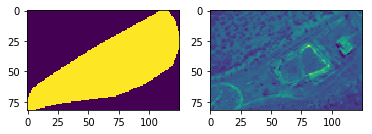

(13375409L,)
(8L, 13375409L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-187631383 is good object: 30
2017-09-14T07:59:55.356Z
1030010070409100
Grass


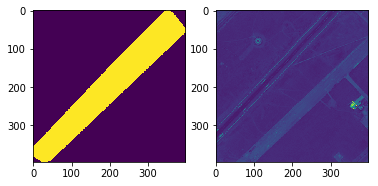

(13375409L,)
(8L, 13375409L)
Good Training Data? (y/n) y
-----------------------------------------

Multipolygon - skipping object: 31

-----------------------------------------

image for OSM-way-187631387 is good object: 32
2017-09-14T07:59:55.356Z
1030010070409100
Grass


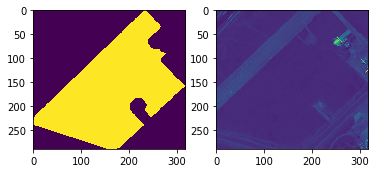

(13533017L,)
(8L, 13533017L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-190581283 is good object: 33
2017-09-14T07:59:55.356Z
1030010070409100
Grass


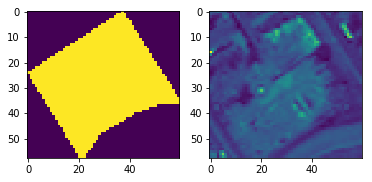

(13625237L,)
(8L, 13625237L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-25725082 is good object: 34
2017-09-14T07:59:55.356Z
1030010070409100
Grassland


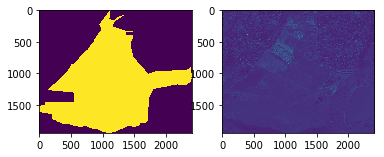

(13625237L,)
(8L, 13625237L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-426542852 is good object: 35
2017-09-14T07:59:55.356Z
1030010070409100
Grass


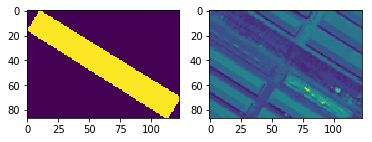

(18311283L,)
(8L, 18311283L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-196094666 is good object: 36
2017-09-14T07:59:55.356Z
1030010070409100
Grassland


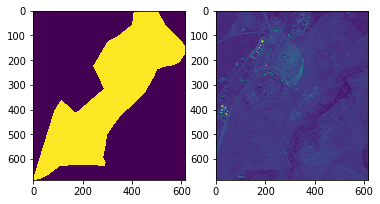

(18311283L,)
(8L, 18311283L)
Good Training Data? (y/n) y
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-78521398 is good object: 38
2016-05-25T08:00:30.479Z
10300100570CBD00
Grass


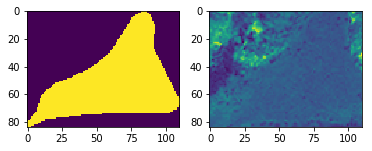

(18733243L,)
(8L, 18733243L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-426542851 is good object: 39
2017-09-14T07:59:55.356Z
1030010070409100
Grass


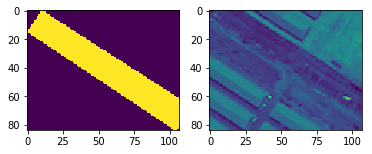

(18742483L,)
(8L, 18742483L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

Multipolygon - skipping object: 40

-----------------------------------------

image for OSM-way-65283559 is good object: 41
2017-09-14T07:59:55.356Z
1030010070409100
Grass


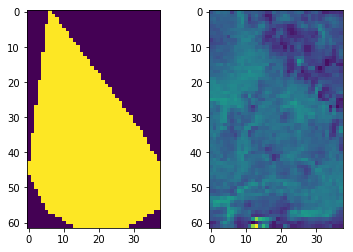

(18742483L,)
(8L, 18742483L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-62444677 is good object: 42
2017-09-14T07:59:55.356Z
1030010070409100
Water


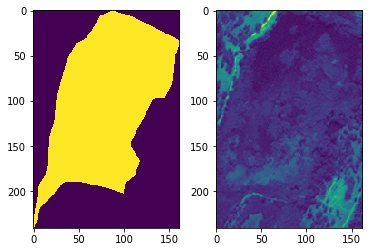

(18744839L,)
(8L, 18744839L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-59530670 is good object: 44
2017-09-14T07:59:55.356Z
1030010070409100
Water


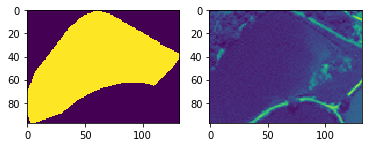

(18744839L,)
(8L, 18744839L)
Good Training Data? (y/n) y
-----------------------------------------

Multipolygon - skipping object: 45

-----------------------------------------

image for OSM-way-20642261 is good object: 46
2017-09-14T07:59:55.356Z
1030010070409100
Water


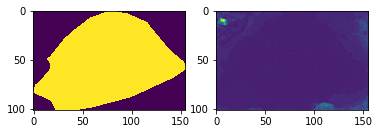

(18757775L,)
(8L, 18757775L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-28043570 is good object: 47
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


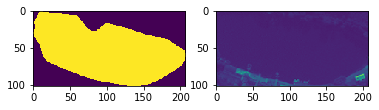

(18773430L,)
(8L, 18773430L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-57953880 is good object: 48
2017-09-14T07:59:55.356Z
1030010070409100
Water


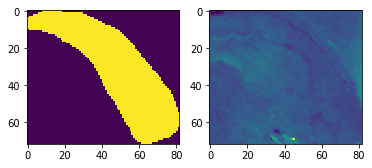

(18794544L,)
(8L, 18794544L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-62444524 is good object: 49
2017-09-14T07:59:55.356Z
1030010070409100
Water


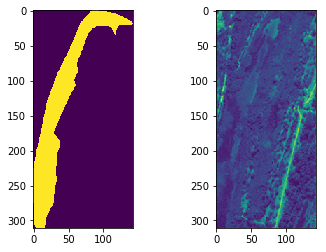

(18794544L,)
(8L, 18794544L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-20574622 is good object: 50
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


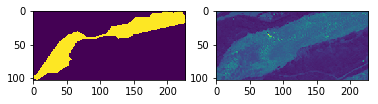

(18794544L,)
(8L, 18794544L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-33767672 is good object: 51
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


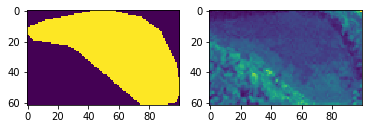

(18817925L,)
(8L, 18817925L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-59530668 is good object: 52
2017-09-14T07:59:55.356Z
1030010070409100
Water


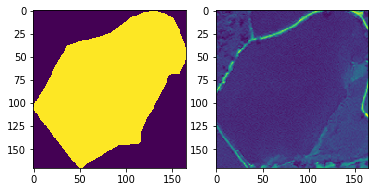

(18824125L,)
(8L, 18824125L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-20574925 is good object: 53
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


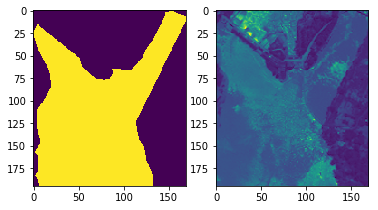

(18852340L,)
(8L, 18852340L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-167318961 is good object: 54
2016-11-09T08:01:26.047Z
1030010061CF0900
Water


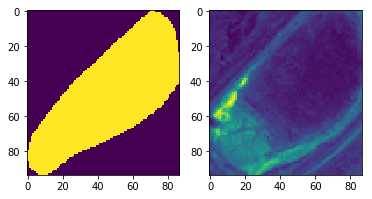

(18885295L,)
(8L, 18885295L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-20575140 is good object: 56
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


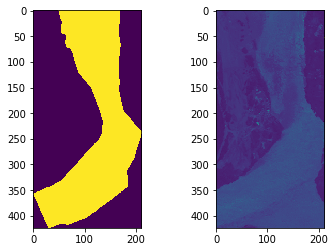

(18885295L,)
(8L, 18885295L)
Good Training Data? (y/n) y
-----------------------------------------

Multipolygon - skipping object: 57

-----------------------------------------

image for OSM-way-33767491 is good object: 58
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


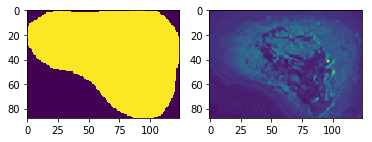

(18974759L,)
(8L, 18974759L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-59530669 is good object: 59
2017-09-14T07:59:55.356Z
1030010070409100
Water


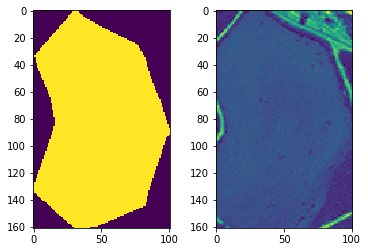

(18974759L,)
(8L, 18974759L)
Good Training Data? (y/n) y
-----------------------------------------

no image
-----------------------------------------

image for OSM-way-62449591 is good object: 61
2017-09-14T07:59:55.356Z
1030010070409100
Water


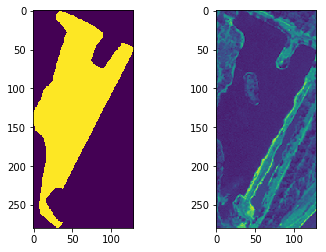

(18991020L,)
(8L, 18991020L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-62444730 is good object: 62
2017-09-14T07:59:55.356Z
1030010070409100
Water


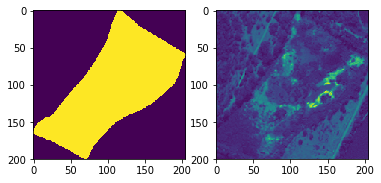

(18991020L,)
(8L, 18991020L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-169617272 is good object: 63
2017-09-14T07:59:55.356Z
1030010070409100
Water


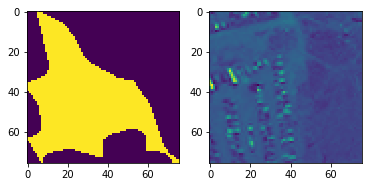

(18991020L,)
(8L, 18991020L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

-----------------------------------------

image for OSM-way-59530667 is good object: 65
2017-09-14T07:59:55.356Z
1030010070409100
Water


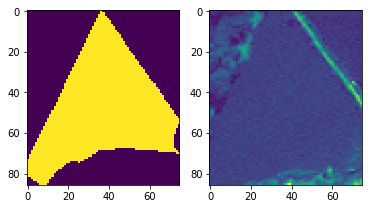

(18991020L,)
(8L, 18991020L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-20574515 is good object: 66
2016-05-25T08:00:30.479Z
10300100570CBD00
Water


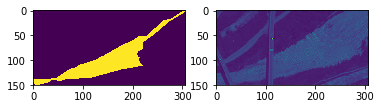

(18997470L,)
(8L, 18997470L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-57941386 is good object: 67
2017-09-14T07:59:55.356Z
1030010070409100
Building


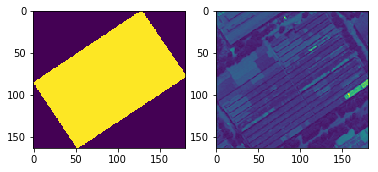

(18997470L,)
(8L, 18997470L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-62154959 is good object: 68
2017-09-14T07:59:55.356Z
1030010070409100
Building


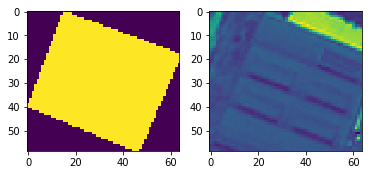

(19026973L,)
(8L, 19026973L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-58756399 is good object: 69
2017-09-14T07:59:55.356Z
1030010070409100
Building


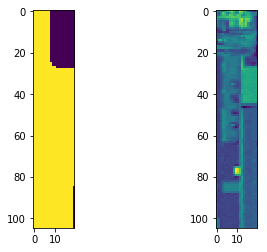

(19030749L,)
(8L, 19030749L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-422389476 is good object: 70
2017-11-13T08:15:21.999Z
1040010035BF7700
Building


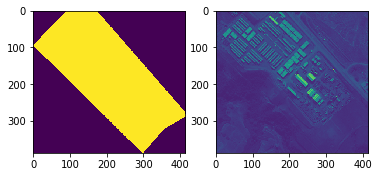

(19030749L,)
(8L, 19030749L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-78298966 is good object: 71
2017-09-14T07:59:55.356Z
1030010070409100
Building


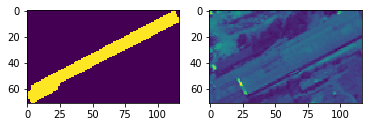

(19030749L,)
(8L, 19030749L)
Good Training Data? (y/n) y
-----------------------------------------

Multipolygon - skipping object: 72

-----------------------------------------

image for OSM-way-61606282 is good object: 73
2017-09-14T07:59:55.356Z
1030010070409100
Building


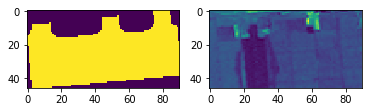

(19039056L,)
(8L, 19039056L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-78164383 is good object: 74
2017-09-14T07:59:55.356Z
1030010070409100
Building


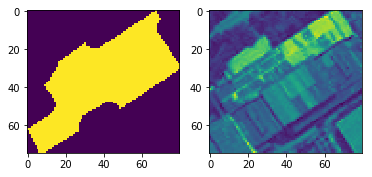

(19043196L,)
(8L, 19043196L)
Good Training Data? (y/n) y
-----------------------------------------

Multipolygon - skipping object: 75

-----------------------------------------

image for OSM-way-57711720 is good object: 76
2017-09-14T07:59:55.356Z
1030010070409100
Building


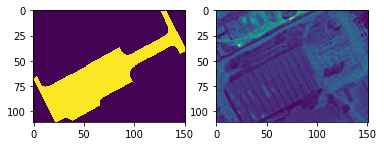

(19049196L,)
(8L, 19049196L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-59528640 is good object: 77
2017-09-14T07:59:55.356Z
1030010070409100
Building


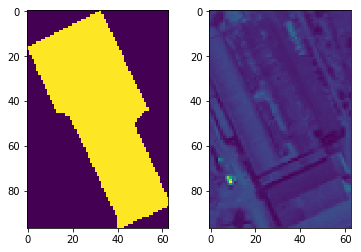

(19049196L,)
(8L, 19049196L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-25753200 is good object: 78
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


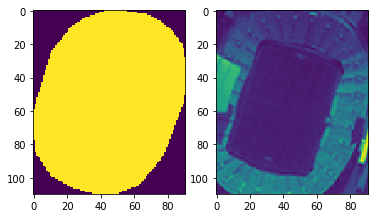

(19055307L,)
(8L, 19055307L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-58436916 is good object: 79
2017-09-14T07:59:55.356Z
1030010070409100
Building


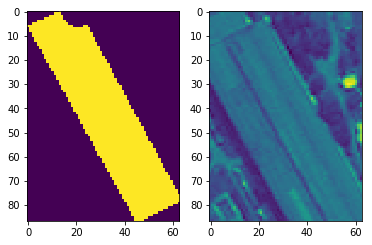

(19055307L,)
(8L, 19055307L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-57792711 is good object: 80
2017-11-13T08:15:21.999Z
1040010035BF7700
Building


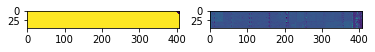

(19060788L,)
(8L, 19060788L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-58436398 is good object: 81
2017-09-14T07:59:55.356Z
1030010070409100
Building


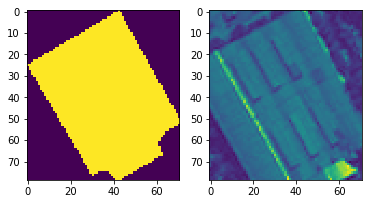

(19060788L,)
(8L, 19060788L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-58791496 is good object: 82
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


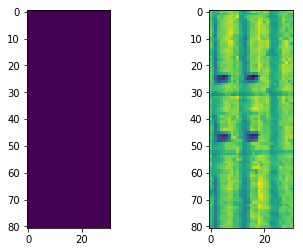

(19066397L,)
(8L, 19066397L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-34148419 is good object: 83
2017-09-14T07:59:55.356Z
1030010070409100
Building


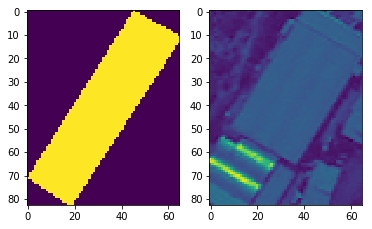

(19066397L,)
(8L, 19066397L)
Good Training Data? (y/n) y
-----------------------------------------

Multipolygon - skipping object: 84

-----------------------------------------

image for OSM-way-224230171 is good object: 85
2016-11-09T08:01:26.047Z
1030010061CF0900
Building


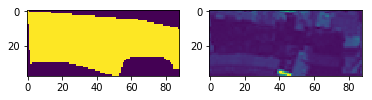

(19071792L,)
(8L, 19071792L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-59466578 is good object: 86
2017-09-14T07:59:55.356Z
1030010070409100
Building


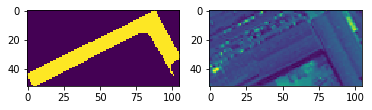

(19071792L,)
(8L, 19071792L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-57787244 is good object: 87
2017-11-13T08:15:21.999Z
1040010035BF7700
Building


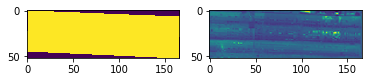

(19071792L,)
(8L, 19071792L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-58756463 is good object: 88
2017-09-14T07:59:55.356Z
1030010070409100
Building


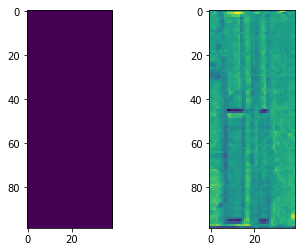

(19080424L,)
(8L, 19080424L)
Good Training Data? (y/n) n
training sample rejected
-----------------------------------------

image for OSM-way-58437101 is good object: 89
2017-09-14T07:59:55.356Z
1030010070409100
Building


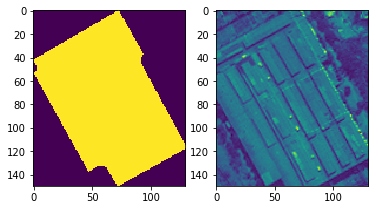

(19080424L,)
(8L, 19080424L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-61155022 is good object: 90
2017-11-13T08:15:21.999Z
1040010035BF7700
Building


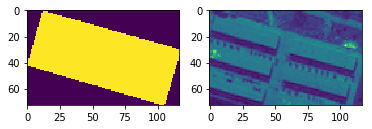

(19099924L,)
(8L, 19099924L)
Good Training Data? (y/n) y
-----------------------------------------

image for OSM-way-58509686 is good object: 91
2017-09-14T07:59:55.356Z
1030010070409100
Building


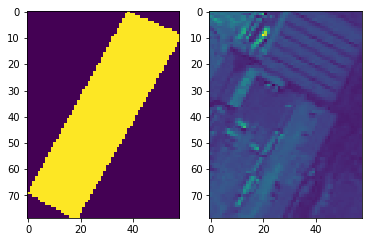

(19108465L,)
(8L, 19108465L)
Good Training Data? (y/n) n
training sample rejected


In [9]:
################ this takes some time

from PIL import Image, ImageDraw
import copy
import numpy as np

label_all = np.array([])
data_all = np.array([])

for objects in selection_all.index:
    
    print '-----------------------------------------\n'
    ### setting a buffer can remove the polygon or make it into a multipolygon, both are unusable so check if this is the case
    park_utm = transform(project_utm, geom_list_selection_all[objects])  # apply projection
    
    # perform check # get x y coordinates of polygon and set a buffer if polygon is large enough
    if (park_utm.buffer(buffer_size).type != 'Polygon') | (park_utm.buffer(buffer_size).area == 0):
        
        message = "Multipolygon - skipping"
        
        print message + ' object: ' + str(objects) +'\n'
    
    else: 
        
        x,y = park_utm.buffer(buffer_size).exterior.xy

        park_buffer_wgs = transform(project_wgs,park_utm.buffer(buffer_size))  # apply projection  

        # get wgs projected x,y coordinates and create bounding box for image aquisition
        x_wgs,y_wgs = park_buffer_wgs.exterior.xy
        
        bbox_park_area_float = min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)

        bbox_park_area = str([min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)])

        bbox_park_area_str = nf.listToStringWithoutBrackets(bbox_park_area)

        # convert bounding box to well known format usable by GBDX tools
        bbox_wkt = box(*bbox_park_area_float).wkt

        selection_images = nf.image_query_check(bbox_wkt,park_utm,buffer_size,project_wgs,x_wgs,y_wgs)

        if not selection_images.empty:
            
            # set park bounding box 
            bbox = env.inputs.get('bbox', bbox_park_area_str)

            # set catalog id from selection
            catalog_id = env.inputs.get('catalog_id', selection_images.id[0])

            # collect image
            try:
                
                image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")),proj=UTM_EPSG_code,pansharpen=False)
                
                #create array from GBDX image
                image_array = image[:,:,:].read()

                # get second band to see if image is defective (some images show only black)
                # use image if not defective, otherwise 
                if (image_array.size == 0):

                    print('no image')

                elif (image_array[1,:,:].min() != 0) :


                    print 'image for ' + selection_all.OSM_id[objects] + ' is good object: ' + str(objects )
                    print image.ipe_metadata["image"]["acquisitionDate"]
                    print image.cat_id
                    print selection_all.item_type[objects]
                    #print 'Master Type: %s' % dict_type[selection_all.item_type[objects]]

                    # resize polygon and plot polygon over image
                    # subtract minimal values from utm polygon x and y to set 0,0 point as start 
                    x1 = np.subtract(x, min(x))
                    y1 = np.subtract(y, min(y))

                    # devide the x and y coordinate of the polygon by the size of the image to match both sizes 
                    x2 = np.divide(x1,max(x1)/image.shape[2])
                    y2 = np.divide(y1,max(y1)/image.shape[1])

                    n_bands, rows, cols  = image.shape

                    # calculate total cells for each class by masking and setting pixel values to 1

                    # create sequence of edited x and y coordinates, width and heigth  for use in ImageDraw function
                    polygon = [(x2[i], y2[i]) for i in range(len(x2))]
                    width = image.shape[2]
                    height = image.shape[1]

                    # convert polygon coordinates to raster/array values using ImageDraw
                    img = Image.new('L', (width, height), 0)
                    ImageDraw.Draw(img).polygon(polygon, fill=dict_type[selection_all.item_type[objects]])

                    # convert image to array and set as mask
                    mask = np.array(img)

                    # flip the array for matching with the mask array
                    image_array_flipped = np.fliplr(image_array[:,:,:])
                    reshaped_data = image_array_flipped.reshape(8,(rows*cols))
                    reshaped_label = mask.reshape(1,(rows*cols))

                    # Two subplots, the axes array is 1-d
                    f, axarr = plt.subplots(1,2)
                    axarr[0].imshow(mask)
                    axarr[1].imshow(image_array_flipped[1])

                    plt.show()

                    print label_all.shape
                    print data_all.shape

                    #ask user if this is good data
                    decision = raw_input("Good Training Data? (y/n) ")

                    if decision == 'y':

                        # check if this is the first iteration, if so add the first data set otherwise:
                        # append the new image data to the other data
                        if data_all.size == 0:

                            data_all = reshaped_data 

                        else: 

                            data_all = np.concatenate((data_all,reshaped_data), axis = 1)

                        label_all = np.append(label_all,reshaped_label)

                    elif decision == 'n':

                        print 'training sample rejected'

                        pass
            except:
                print 'image defective' 
                # move to next without doing analysis
                pass

        else:

            print 'no image' 
            # move to next without doing analysis      
            
################ this takes a long time

In [10]:
### Remove pixels without class

label_all_no0 = label_all[label_all != 0]
data_all_no0 = data_all[:,label_all != 0]

In [11]:
### write data to pickle

pick = r'C:\Users\charl\Documents\GOST\Georgia\pickle'

import pickle

with open(os.path.join(pick, 'selection_objects_all_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(selection_all, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(os.path.join(pick, 'geom_list_selection_all{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(geom_list_selection_all, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(os.path.join(pick, 'project_utm_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(project_utm, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(os.path.join(pick, 'project_wgs_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(project_wgs, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(os.path.join(pick, 'UTM_EPSG_code_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(UTM_EPSG_code, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(os.path.join(pick, 'label_all_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(label_all_no0, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(os.path.join(pick, 'data_all_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(data_all_no0, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

from osgeo import gdal
from sklearn import metrics

# A list of "random" colors (for a nicer output)
COLORS = ["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941"]

### import data from other notebook

pick = r'C:\Users\charl\Documents\GOST\Georgia\pickle'

with open(os.path.join(pick, 'data_all_{}.pickle'.format(city)), 'rb') as handle:
    data_all = pickle.load(handle)
    
with open(os.path.join(pick, 'label_all_{}.pickle'.format(city)), 'rb') as handle:
    label_all = pickle.load(handle)
    
data = pd.DataFrame(data_all.T)

data['class'] = label_all
data['class'] = data['class'].astype('category')

# Calculate NDVI

# 8-band (0:Coastal, 1:Blue, 2:Green, 3:Yellow, 4:Red, 5:Red-edge, 6:NIR1, 7:NIR2) Multispectral

# ndvi = (nir - red)/(nir + red)

# EVI = 2.5 * ( nir - red ) / ( nir + 6.5 * red - 7.5 * blue+ 1.0 )

data['ndvi'] = (data[6] - data[4])/(data[6] + data[4])

data['water_index'] = (data[7] - data[0]) / (data[7] + data[0])

data['NDBI'] = (data[6] - data[5])/(data[6] + data[5]) 

data['NDBI2'] = (data[7] - data[5])/(data[7] + data[5]) 

data['iron'] = (data[2]*data[3]) / (data[1]*1000)

#data['EVI'] = 2.5 * (data[6] - data[4]) / (data[6] + 6.5 * data[4] - 7.5 * data[1] + 1 )

y = data['class']

data.columns = ['0', '1', '2', '3', '4', '5', '6', '7','class','ndvi', 'water_index', 'NDBI', 'NDBI2', 'iron']
traindf = data[:((len(data)/3)*2)]

X = data.drop('class', axis = 1)

### Sci-kit Learn

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# initialize search space (as a library!)

param_grid = {
    'n_estimators' : [1,3,5,10,20,30,40,50,60,70,80,90,100],
    'max_features' : [1,2,3,4,5,6,7,8,9,10,11,12,13]}

gs = make_pipeline(     StandardScaler(), 
                        GridSearchCV(RandomForestClassifier(min_samples_leaf=2),
                        param_grid = param_grid,
                        cv = 2,
                        refit = True,
                        n_jobs = -1,
                        verbose = 2))

# Instantiate random forest. You can specify default parameters here.
# These parameters are not being optimized.

In [ ]:
# initialize grid search
answer = raw_input('start model fit? (y/n) ')
if answer == 'y':
    gs.fit(X_train,y_train)
    y_pred = gs.predict(X_test)
    print(classification_report(y_test, y_pred))
else:
    pass

start model fit? (y/n) y
Fitting 2 folds for each of 4 candidates, totalling 8 fits


### AutoML

In [181]:
import h2o
from h2o.automl import H2OAutoML
from h2o.frame import H2OFrame

h2o.init()

train2o = H2OFrame(python_obj = traindf)

x = train2o.columns
y = "class"
x.remove(y)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 41 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,"21 days, 6 hours and 3 minutes"
H2O cluster name:,H2O_from_python_charl_n54q43
H2O cluster total nodes:,1
H2O cluster free memory:,9.75 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [182]:
aml = H2OAutoML(max_runtime_secs = 600)
aml.train(x = x, y = y,
          training_frame = train2o)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [183]:
X_test_2 = H2OFrame(python_obj = X_test)
y_pred_2 = aml.predict(X_test_2)
y_pred_2 = y_pred_2.as_data_frame(use_pandas=True)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


### Finish and Save Down

In [65]:
# write trained classifier to pickle
with open(os.path.join(pick,'trained_classifier_{}.pickle'.format(city)), 'wb') as handle:
    pickle.dump(gs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [66]:
bbox = gpd.read_file(r'C:\Users\charl\Documents\GOST\Georgia\Admin_Boundary\bbox_test.shp')
bbox = bbox.to_crs({'init' :'epsg:4326'})
bbox = bbox.geometry.loc[0]
bbox = str(bbox.bounds).replace('(',"").replace(')',"")
UTM_EPSG_code = 'EPSG:32638'
catalog_id = '1030010061CF0900'
image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")),
                                 proj=UTM_EPSG_code,pansharpen=False)
image_array = image.read()

In [190]:
# (8, 312, 531)
# n_b, r, c

n_bands, rows, cols = image_array.shape

n_samples = rows*cols
  
h = image_array.shape[1]
w = image_array.shape[2]

zeroes = np.zeros((5,h,w))

data = np.vstack((image_array, zeroes))

data[8,:,:] = (data[6] - data[4])/(data[6] + data[4])

data[9,:,:] = (data[7] - data[0]) / (data[7] + data[0])

data[10,:,:] = (data[6] - data[5])/(data[6] + data[5]) 

data[11,:,:] = (data[7] - data[5])/(data[7] + data[5]) 

data[12,:,:] = (data[2]*data[3]) / (data[1]*1000)

# image_array_flipped = np.fliplr(image_array[:,:,:])
reshaped_data = data.reshape(13,(rows*cols))

In [113]:
result = gs.predict(reshaped_data.T)
classification = result.T.T.T.reshape((rows, cols))

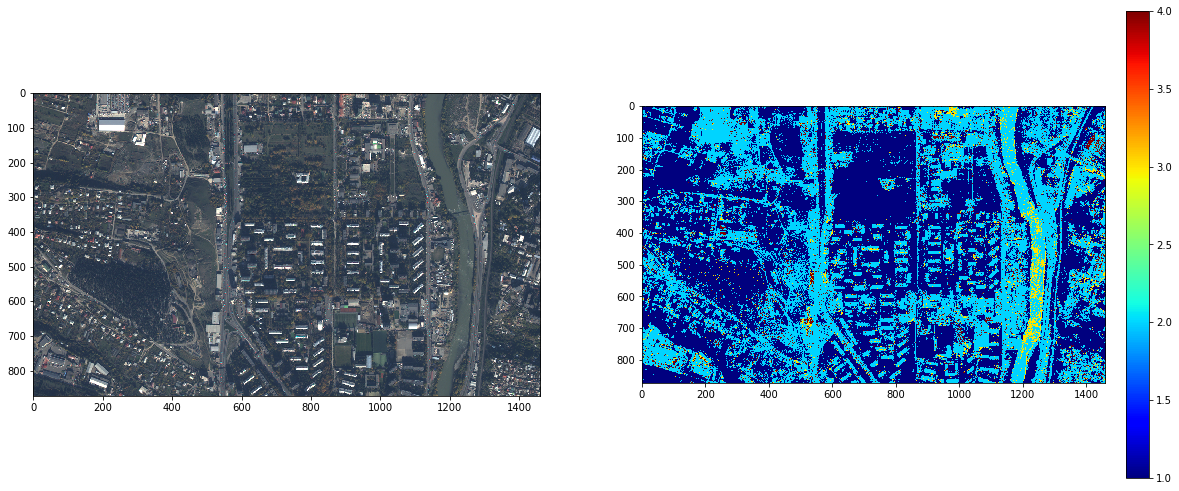

In [114]:
# dict_type = {'Forest': 1,'Wood': 1,'Nature Reserve': 1,'Wetland': 1, 'Grass': 2, 'Water': 3, 'Building': 4}

from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib import pyplot as plt
f = plt.figure( figsize = (20,20))
f.add_subplot(1, 2,1)
r = image_array[3,:,:]
g = image_array[2,:,:]
b = image_array[1,:,:]
rgb = np.dstack([r,g,b])
f.add_subplot(1, 2, 1)
plt.imshow(rgb/3000)
f.add_subplot(1, 2, 2)

im = plt.imshow(classification,cmap='jet')

plt.colorbar(im,fraction=0.046, pad=0.04)